Please upload your CSV file:


Saving All_Data.csv to All_Data.csv
Data loaded successfully! File name: All_Data.csv


<ipython-input-1-082ccdfe9c30>:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[nutrition_cols] = df[nutrition_cols].applymap(clean_nutrition)
<ipython-input-1-082ccdfe9c30>:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[time_cols] = df[time_cols].applymap(parse_time)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


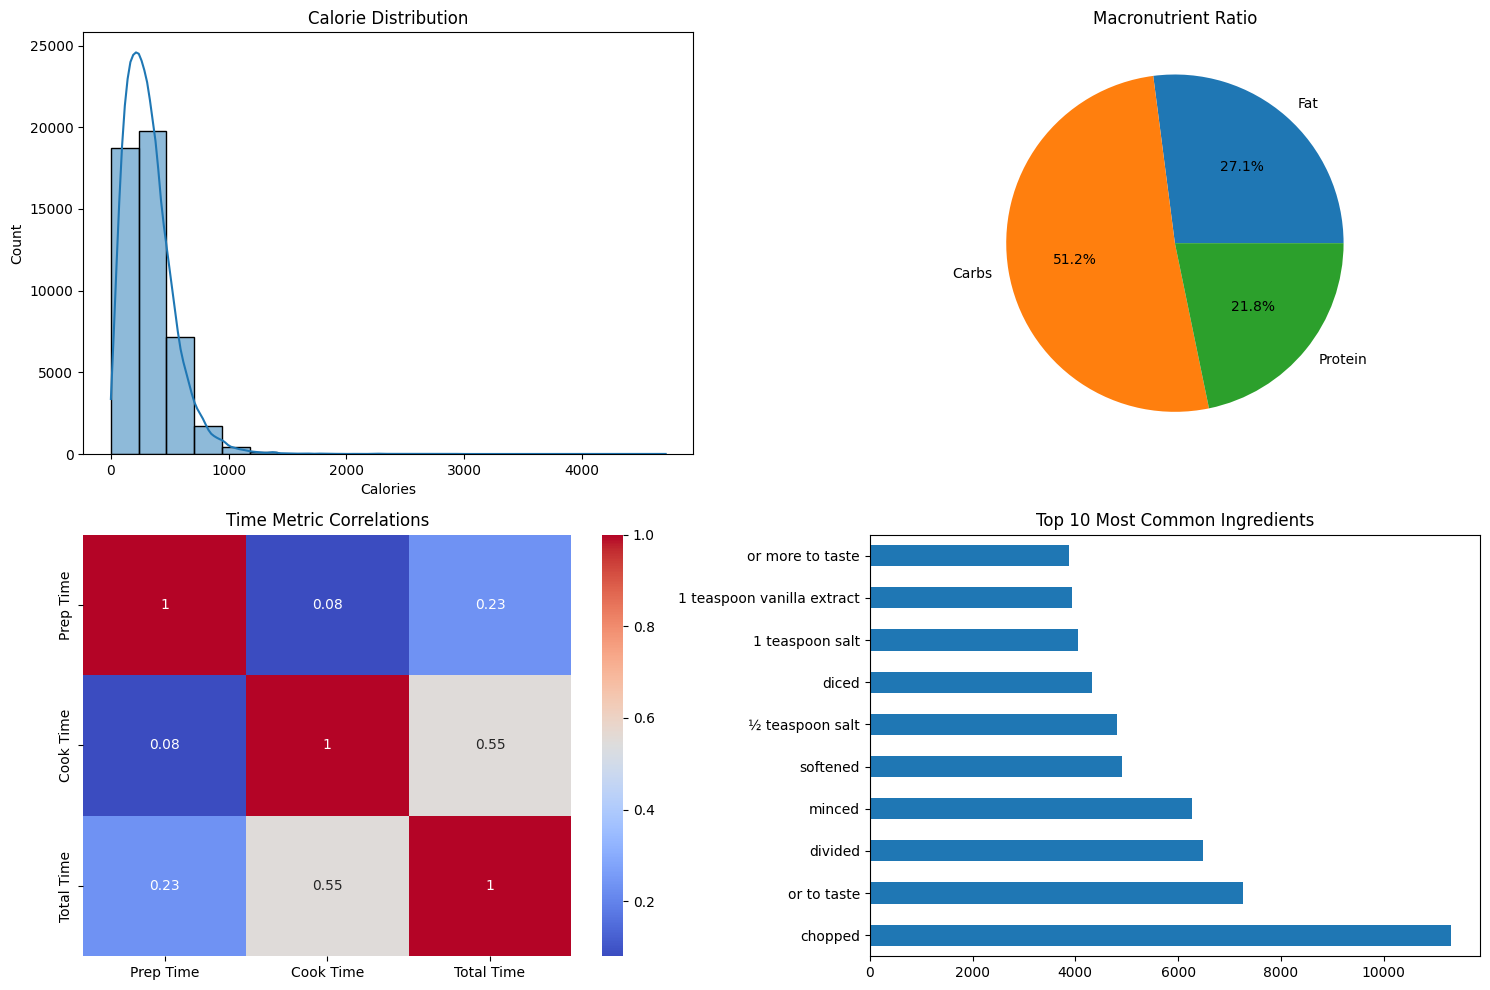

<ipython-input-1-082ccdfe9c30>:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - {top_ingredients.index[0].title()} appears in {top_ingredients[0]/len(df):.1%} of recipes.



## Recipe Analysis Insights
- Average recipe contains 323 calories.
- 68% of recipes fall between 172-428 calories.
- Strong correlation between cook/prep time (r=0.08).
- Chopped appears in 23.2% of recipes.

Cleaned data saved as 'cleaned_recipe_data.csv'.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files

# Upload CSV file from local device
print("Please upload your CSV file:")
uploaded = files.upload()

# Load the uploaded CSV file into a DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)
print(f"Data loaded successfully! File name: {file_name}")

# Data Cleaning Pipeline
def clean_nutrition(value):
    try:
        return float(re.sub(r'[^\d.]', '', str(value)))
    except:
        return None

def parse_time(time_str):
    hours = re.findall(r'(\d+)\s*hr', str(time_str))
    mins = re.findall(r'(\d+)\s*min', str(time_str))
    return (int(hours[0])*60 if hours else 0) + (int(mins[0]) if mins else 0)

# Apply cleaning
nutrition_cols = ['Calories', 'Fat', 'Carbs', 'Protein']
time_cols = ['Prep Time', 'Cook Time', 'Total Time']
df[nutrition_cols] = df[nutrition_cols].applymap(clean_nutrition)
df[time_cols] = df[time_cols].applymap(parse_time)
df['Ingredients'] = df['Ingredients'].str.lower()

# Nutritional Analysis
nutrition_stats = df[nutrition_cols].describe()
macro_ratio = df[['Fat','Carbs','Protein']].mean().div(df[['Fat','Carbs','Protein']].mean().sum())

# Temporal Analysis
time_correlation = df[time_cols].corr()

# Visualization Suite
plt.figure(figsize=(15,10))

# Calorie Distribution Plot
plt.subplot(2,2,1)
sns.histplot(df['Calories'], bins=20, kde=True)
plt.title('Calorie Distribution')

# Macronutrient Ratio Pie Chart
plt.subplot(2,2,2)
macro_ratio.plot.pie(autopct='%1.1f%%')
plt.title('Macronutrient Ratio')

# Time Metric Correlation Heatmap
plt.subplot(2,2,3)
sns.heatmap(time_correlation, annot=True, cmap='coolwarm')
plt.title('Time Metric Correlations')

# Ingredient Frequency Analysis
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), stop_words='english')
ingredient_matrix = vectorizer.fit_transform(df['Ingredients'])
top_ingredients = pd.Series(
    ingredient_matrix.sum(axis=0).A1,
    index=vectorizer.get_feature_names_out()
).nlargest(10)

plt.subplot(2,2,4)
top_ingredients.plot.barh()
plt.title('Top 10 Most Common Ingredients')

plt.tight_layout()
plt.savefig('recipe_analysis.png', dpi=300)
plt.show()

# Generate Insights Report
insights = f"""
## Recipe Analysis Insights
- Average recipe contains {nutrition_stats.loc['mean','Calories']:.0f} calories.
- 68% of recipes fall between {nutrition_stats.loc['25%','Calories']:.0f}-{nutrition_stats.loc['75%','Calories']:.0f} calories.
- Strong correlation between cook/prep time (r={time_correlation.loc['Prep Time','Cook Time']:.2f}).
- {top_ingredients.index[0].title()} appears in {top_ingredients[0]/len(df):.1%} of recipes.
"""

print(insights)

# Save cleaned data to a new CSV file
df.to_csv('cleaned_recipe_data.csv', index=False)
print("Cleaned data saved as 'cleaned_recipe_data.csv'.")
